PassengerId    0.005007
SibSp          0.035322
Age            0.077221
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Survived       1.000000
Name: Survived, dtype: float64
<class 'pandas.core.indexes.base.Index'>


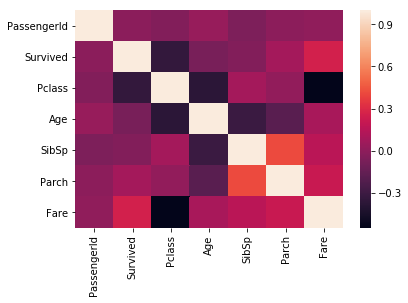

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')
numeric_cols = data.select_dtypes(include=['int','float']).columns
object_cols = data.select_dtypes(exclude=['int','float']).columns

corr_all = data.corr()
sns.heatmap(corr_all)
survive_corr = corr_all['Survived'].abs().sort_values()
print(survive_corr)
print(type(numeric_cols))

#Dealing with Missing values
cols_to_drop = ['PassengerId','Name','Cabin']

train = data.drop(cols_to_drop,axis=1)
plt.show()

Split data into two groups:Numeric and Object
Deal with them seperately

In [169]:
def process_age(df,cut_points,label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_category'] = pd.cut(df['Age'],cut_points,labels=label_names)
    return df

def get_dummy(df,cols):
    dummy = pd.get_dummies(df[cols],prefix=cols)
    df = pd.concat([df,dummy],axis=1)
    return df

def process_fare(df,cutpoints,label_names):
    df['Fare_categories'] = pd.cut(df['Fare'],cut_points,labels=label_names)
    return df

Creating different functions to process features

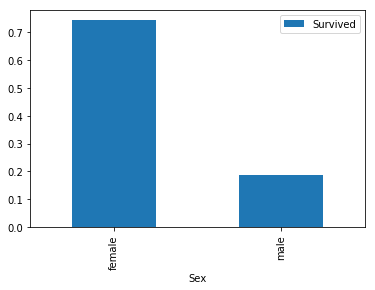

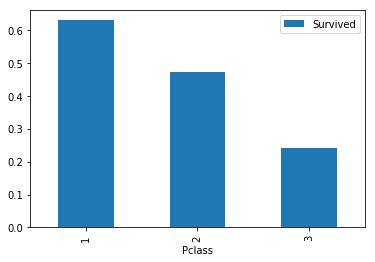

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


In [145]:
sex_pivot = train.pivot_table(index='Sex',values='Survived')
pclass_pivot = train.pivot_table(index='Pclass',values='Survived')

sex_pivot.plot.bar()
pclass_pivot.plot.bar()
plt.show()
print(train.columns)

#Cuz 'Age' is continuous feature and it doesn't make much sense to keep it that way
Transform it into category using function process_age

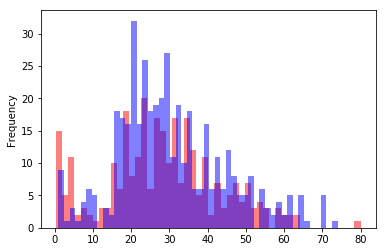

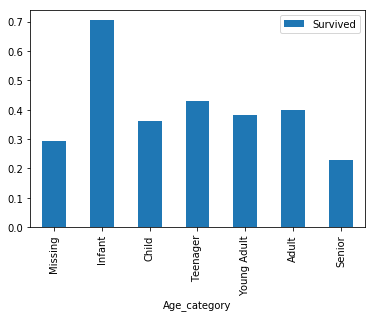

In [146]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

survived['Age'].plot.hist(alpha=0.5,color='red',bins=50)
died['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.show()

#This cut_points end up with 0.78 scores from cross_val_socre with cv=10 and only Pclass Age Sex categorical features
#cut_points = [-1,0,16,60,100]
#labels = ['Missing','Teen','Adult','Senior']

cut_points = [-1,0,5,12,18,35,60,100]
labels = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,labels)
holdout = process_age(holdout,cut_points,labels)

age_cat_pivot = train.pivot_table(index='Age_category',values='Survived')
age_cat_pivot.plot.bar()
plt.show()

Since Age is continuous and it doesn't make much sense to let it be,so transform it to categorical by labels.

In [147]:
train = get_dummy(train,'Age_category')
holdout = get_dummy(holdout,'Age_category')

train = get_dummy(train,'Pclass')
holdout = get_dummy(holdout,'Pclass')

train = get_dummy(train,'Sex')
holdout = get_dummy(holdout,'Sex')

print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
Survived                    891 non-null int64
Pclass                      891 non-null int64
Sex                         891 non-null object
Age                         891 non-null float64
SibSp                       891 non-null int64
Parch                       891 non-null int64
Ticket                      891 non-null object
Fare                        891 non-null float64
Embarked                    889 non-null object
Age_category                891 non-null category
Age_category_Missing        891 non-null uint8
Age_category_Infant         891 non-null uint8
Age_category_Child          891 non-null uint8
Age_category_Teenager       891 non-null uint8
Age_category_Young Adult    891 non-null uint8
Age_category_Adult          891 non-null uint8
Age_category_Senior         891 non-null uint8
Pclass_1                    891 non-null uint8
Pclass_2                    891 non-nul

Add dummies to train&test of features "Age" "Pclass" "Age_category"

In [148]:
train['Embarked'] = train['Embarked'].fillna('S')
train = get_dummy(train,'Embarked')
holdout = get_dummy(train,'Embarked')
print(train.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age_category', 'Age_category_Missing',
       'Age_category_Infant', 'Age_category_Child', 'Age_category_Teenager',
       'Age_category_Young Adult', 'Age_category_Adult', 'Age_category_Senior',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [149]:
from sklearn.preprocessing import minmax_scale

scale_cols = ['SibSp','Parch','Fare']

for col in scale_cols:
    train[col+'_scaled'] = minmax_scale(train[col])
    holdout[col+'_scaled'] = minmax_scale(holdout[col])
print(train.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   23.699966    0.523008    0.381594   32.204208   
std      0.486592    0.836071   17.731181    1.102743    0.806057   49.693429   
min      0.000000    1.000000   -0.500000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    6.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   24.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       Age_category_Missing  Age_category_Infant  Age_category_Child  \
count            891.000000           891.000000          891.000000   
mean               0.198653             0.049383            0.028058   
std                0.399210             0.216787      

c:\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

features = list(train.columns)
features_3 = features[10:]
print(features_3)

lr = LogisticRegression()
scores = cross_val_score(lr,train[features_3],train['Survived'],cv=10)
lr.fit(train[features_3],train['Survived'])
print(scores)
print(np.mean(scores))


['Age_category_Missing', 'Age_category_Infant', 'Age_category_Child', 'Age_category_Teenager', 'Age_category_Young Adult', 'Age_category_Adult', 'Age_category_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']
[0.81111111 0.82222222 0.79775281 0.85393258 0.79775281 0.79775281
 0.78651685 0.78651685 0.85393258 0.84090909]
0.8148399727613211


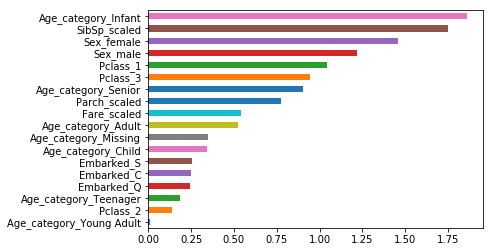

In [164]:
coefficients = lr.coef_
important_features = pd.Series(coefficients[0],index=features_3).abs().sort_values()
important_features.plot.barh()
plt.show()

2nd try : LogisticRegression
Using most 8 relative features with LogisiticRegression 

In [165]:
columns = ['Age_category_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_category_Senior', 'Parch_scaled']

lr = LogisticRegression()
scores = cross_val_score(lr,train[columns],train['Survived'],cv=10)
print(scores)
print(np.mean(scores))


[0.82222222 0.82222222 0.79775281 0.86516854 0.83146067 0.78651685
 0.79775281 0.76404494 0.84269663 0.81818182]
0.8148019521053229


Using features that most relative to the target to fit a Logistic Model
The result is slightly better than the first model we did before which used all categorical features.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age_category', 'Age_category_Missing',
       'Age_category_Infant', 'Age_category_Child', 'Age_category_Teenager',
       'Age_category_Young Adult', 'Age_category_Adult', 'Age_category_Senior',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_scaled', 'Fare_categories',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+'],
      dtype='object')


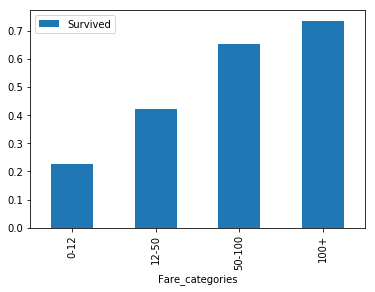

In [177]:
cut_points = [0,12,50,100,1000]
label_names = ['0-12','12-50','50-100','100+']

train = process_fare(train,cut_points,label_names)
holdout = process_fare(holdout,cut_points,label_names)

train = get_dummy(train,'Fare_categories')
holdout = get_dummy(train,'Fare_categories')
print(train.columns)

fare_category = train.pivot_table(index='Fare_categories',values='Survived')
fare_category.plot.bar()
plt.show()

3rd try : LogisticRegression
Add categorical Fare feature

In [181]:
features = list(train.columns)

features_4 = features[10:]
features_4.remove('Fare_categories')
print(features_4)

lr = LogisticRegression()
scores = cross_val_score(lr,train[features_4],train['Survived'],cv=10)
#lr.fit(train[features_4],train['Survived'])
print(scores)
print(np.mean(scores))

['Age_category_Missing', 'Age_category_Infant', 'Age_category_Child', 'Age_category_Teenager', 'Age_category_Young Adult', 'Age_category_Adult', 'Age_category_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+']
[0.77777778 0.78888889 0.78651685 0.84269663 0.80898876 0.7752809
 0.7752809  0.78651685 0.84269663 0.81818182]
0.8002826012938373


4th try : LogisticRegression
Using RFECV to select optimal features from all features we created above.

In [188]:
from sklearn.feature_selection import RFECV
lr = LogisticRegression()


all_Y = train['Survived']
all_X = train[features_4]

selector = RFECV(lr,cv=10)
selector.fit(all_X,all_Y)

optimal_cols = all_X.columns[selector.support_]
print(optimal_cols)

lr1 = LogisticRegression()
score_RFE = cross_val_score(lr1,train[optimal_cols],all_Y,cv=10)
print(score_RFE)
print(np.mean(score_RFE))

Index(['Age_category_Infant', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male',
       'SibSp_scaled'],
      dtype='object')
[0.84444444 0.81111111 0.79775281 0.85393258 0.82022472 0.79775281
 0.78651685 0.75280899 0.83146067 0.80681818]
0.8102823175575985


5th try : KNeighborsClassifier
Using GridSearchCV to search for best params with KNeighborsClassifier estimator

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

para = {
    'n_neighbors':range(1,50)
}
kn = KNeighborsClassifier()
grid_kn = GridSearchCV(kn,param_grid=para,cv=10)
grid_kn.fit(all_X,all_Y)

best_params = grid_kn.best_params_
best_score = grid_kn.best_score_

print(best_params)
print(best_score)
"""
kn_score = {}
k_val = range(1,50)

for k in k_val:
    kn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(kn,all_X,all_Y,cv=10)
    kn_score[k] = np.mean(score)
print(kn_score)

pd.Series(kn_score).plot.bar()
plt.show()

    """


{'n_neighbors': 9}
0.8271604938271605


'\nkn_score = {}\nk_val = range(1,50)\n\nfor k in k_val:\n    kn = KNeighborsClassifier(n_neighbors=k)\n    score = cross_val_score(kn,all_X,all_Y,cv=10)\n    kn_score[k] = np.mean(score)\nprint(kn_score)\n\npd.Series(kn_score).plot.bar()\nplt.show()\n\n    '

6th try : RandomForest

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_param = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

grid_rf = GridSearchCV(rf,param_grid=rf_param,cv=10)
grid_rf.fit(all_X,all_Y)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_
print(best_rf_params)
print(best_rf_score)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8305274971941639
